# SA54 Python/Machine Learning CA Workshop 2
### Image Classification using Convolutional Neural Networks

##### SA 54 Team 3<br>
Cheong Wei Ming Marcus - A0124816H<br>
Kolanjhikannan Akshayahasinee – A0249484N<br>
Htoo Eain Si Lwin – A0249489E<br>
Gabriel Chua Reyes – A0249469J<br>
Jithin Krishnan – A0249481W<br>
Tian Shuang – A0249479H

# Base Code

To have a baseline model to improve upon using the provided training and test data, the machine learning process requires the relevant Python packages to be imported.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import os.path
import random

### Uploading Training Dataset

A user-defined method to upload the images to the dataset was constructed. The same method will be used for uploading the train and test datasets, using different parameters.

In [2]:
def datasetUpload(img_path, resol, numb):
    fruits = ['apple', 'banana', 'orange', 'mixed']
    one_hot = {
        'apple': [1, 0, 0, 0],
        'banana': [0, 1, 0, 0],
        'orange': [0, 0, 1, 0],
        'mixed': [0, 0, 0, 1]}

    train_label = []
    x_set = None
    y_set = []

    for fruit in fruits:
        count = 0
        for file_name in os.listdir(img_path):
            if count < numb:
                if file_name[0:len(fruit)] == fruit:
                    img_raw = Image.open(img_path + '/' + file_name)
                    img_rgb = img_raw.convert("RGB")
                    img_tiny = img_rgb.resize((resol, resol))
                    train_label.append([img_tiny, one_hot[fruit]]) # put both img object and label into a list so that we can shuffle. It is recommended to shuffle if some images from the same set will be used for validation so as to avoid biasness.
                    count += 1

        print(f'{fruit} count: {count}')

    random.shuffle(train_label) # where the magic happens
    
    for i in train_label: # seperating img and label into their respective arrays
        if x_set is None:
            x_set = i[0]
        else:
            x_set = np.concatenate((x_set, i[0]))
        y_set.append(i[1])
    
    x_set = x_set.reshape(-1, resol, resol, 3)

    return x_set, np.array(y_set)

The x_set output represents the collection of matrices compiled from the images of the training data, while the y_yet represents the label for that specific image, represented in a one-hot encoded vector. For example, x_set[n] will be an image of an apple, while y_set[n] will be the one-hot encoded vector for the "apple" label [1, 0, 0, 0].

The code below executes the user-defined method above on the training dataset folder. 

In [3]:
train_path = 'train'
resol = 64

x_train, y_train = datasetUpload(train_path, resol, 999)

print(x_train.shape)  
print(y_train.shape)  

c:\Users\GG.MaX\Desktop\myPythonProj\env\lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


apple count: 75
banana count: 71
orange count: 72
mixed count: 22
(240, 64, 64, 3)
(240, 4)


As seen above, the shape of the datasets represents:
1) the number of datapoints/samples, 
2) the image dimensions, and 
3) color channel for the training data (added via the reshape method).

### Constructing Machine Learning Model

The code below displays the basic layers used for the construction of the model. For the base code, the team decided to use 4 layers: 2 convolutional layers at the beginning, 1 flatten layer at the middle, and a dense layer at the end with 4 nodes to represent the labels of our dataset.

In [4]:
#set up model
model = tf.keras.Sequential()

#create Convolution Layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))

#create Flatten Layer
model.add(tf.keras.layers.Flatten())

#create Dense Layer
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

model.layers

### Training the Model using Training Dataset

The code below displays the method with which the model is trained. When fitting the model, all the values of the x_train dataset were divded by 255 to normalize the values to [0, 1], making training the model more efficient.

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(x=x_train/255, y=y_train, epochs=15)

Epoch 1/15
8/8 [==============================] - 2s 166ms/step - loss: 2.3157 - accuracy: 0.3458
Epoch 2/15
8/8 [==============================] - 1s 165ms/step - loss: 1.2365 - accuracy: 0.4125
Epoch 3/15
8/8 [==============================] - 1s 169ms/step - loss: 1.1072 - accuracy: 0.6250
Epoch 4/15
8/8 [==============================] - 1s 165ms/step - loss: 0.8408 - accuracy: 0.7125
Epoch 5/15
8/8 [==============================] - 1s 163ms/step - loss: 0.6320 - accuracy: 0.7625
Epoch 6/15
8/8 [==============================] - 1s 163ms/step - loss: 0.3553 - accuracy: 0.9083
Epoch 7/15
8/8 [==============================] - 1s 170ms/step - loss: 0.1876 - accuracy: 0.9417
Epoch 8/15
8/8 [==============================] - 1s 164ms/step - loss: 0.1397 - accuracy: 0.9458
Epoch 9/15
8/8 [==============================] - 1s 161ms/step - loss: 0.1015 - accuracy: 0.9667
Epoch 10/15
8/8 [==============================] - 1s 169ms/step - loss: 0.0810 - accuracy: 0.9792
Epoch 11/15
8/8 [==

### Uploading Test Dataset

The code above runs the user-defined method for uploading again over the /test/ folder this time to create the test dataset.

In [6]:
#uploading x_test and y_test

test_path = 'test'

x_test, y_test = datasetUpload(test_path, resol, 999)

x_test.shape  

apple count: 19
banana count: 18
orange count: 18
mixed count: 5


(60, 64, 64, 3)

### Evaluating the Model

After the test dataset has been compiled, the fuly-trained model is now evaulated using said dataset. As with the training dataset, the test dataset values are normalized for ease of evaluating.

In [7]:
loss, accuracy = model.evaluate(x = x_test/255, y = y_test)
print("Loss: ", loss, "\tAccuracy: ", accuracy)

2/2 [==============================] - 0s 21ms/step - loss: 0.5855 - accuracy: 0.8833
Loss:  0.5855228304862976 	Accuracy:  0.8833333253860474


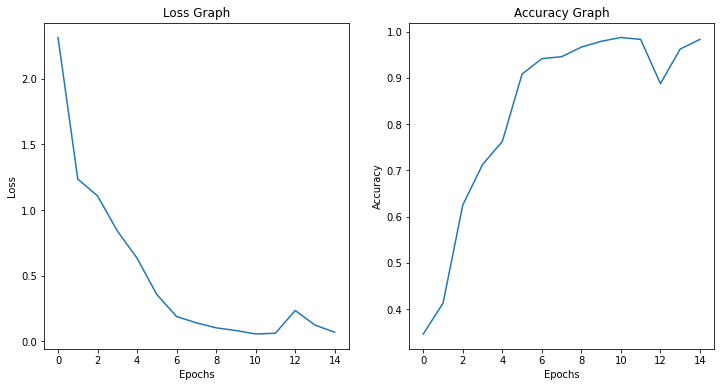

In [8]:
def LossAndAccuracyGraph(hist_model):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    ax[0].plot(hist_model.history['loss'])
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Loss Graph')

    ax[1].plot(hist_model.history['accuracy'])
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_title('Accuracy Graph')

    plt.show()

LossAndAccuracyGraph(hist)

After training and evaluating the model, the charts above displaying the progress of the model's loss and accuracy show a decent percentage of around 83-87 percent. The team will implement some refinements and fine-tuning on the entire machine learning process to create a better model that can ideally predict the provided test data to no less than 90 percent.

# Improvements

### Points for Improvement

The team looked to find way to improve the accuracy of the model. Some points brought up were:

##### 1) Increasing the Amount of Training Data Samples

The current dataset only has a total of 240 images. The amount of data samples for the model to learn from is very few and may result in overtraining at a very early stage. To reduce redundancy and to strengthen the model, image/data augmentation was applied. Image augmentation is the process of editing the image via Python code so that it would represent another image with the same label as the original. Flipping, rotating, even increasing the color contrast of the image will artifically increase the dataset size without having to create new images. Since these will be represented as completely different matrices when the model is learning them, a single image can represent multiple samples when augmented multiple times.

##### 2) Balancing the Training Dataset

The original dataset had a very imbalanced proportion of samples. There were a total of 76 apple images, 76 banana images, 76 orange images and 20 mixed fruit images. This skews the model towards recognizing other fruits, but not when there are multiple fruits in the picture. Using image augmentation on the mixed fruit samples lets the model train from an equal proportion of samples, and will result in a more accurate model.

##### 3) Increasing the Layers in the Machine Learning Model

As the original model only had 4 layers, the team decided to experiment with the different layers that a CNN can use. These range from Convolutional Layers, Max Pooling Layers, Flatten Layers, Dropout Layers and Dense Layers. Since the model can have any number of these layers as well as each layer having their own properties to tweak and refine, multiple configurations were tried until the arrangement with the most consistently high accuracy was built.

##### 4) Tweaking Learning Parameters

Since the actual fitting had its own properties like batch size, number of epochs, validation split, etc., the team also decided to experiment with these parameters. Tweaking the parameters did not significantly increase the accuracy of the model when it used the original dataset, so (1) and (2) were prioritized above this point.  

##### Others

Other steps taken that concerned the training dataset itself were correcting the labels and removing those that did not represent the data properly. For example, some images of mixed fruits were labeled as oranges. The team took to relabeling these images so as to refine the model's training.

### Balancing the Training Dataset and Increasing the Amount of Training Data Samples

The process of creating synthetic images for the purpose of increasing the size of the dataset is called data augmentation. This is done via Python code, and importing PIL packages, allowing the images to be manipulated. Since this code changes the positioning, rotation, orientation, contrast, etc., these will reflect as different matrices when added to the dataset, and will increase the samples that represent the labels of our model. Since the current dataset has only 76 samples for each individual fruit and only 20 samples for mixed fruit, codes were written to (1) create new images to increase the count of overall samples in the dataset and (2) increase the number of mixed fruit samples so as to match the rest of the labels.

The code below copies each sample in the dataset to a new folder and creates additional images by rotation, flipping, contrast changing & shifting the images. In the case of mixed fruit samples, new images were created to equalize the number of samples for each label.

In [9]:
from PIL import Image
from PIL import ImageEnhance
from matplotlib import pyplot as plt
from random import seed
from random import randint
import os
import glob


def manipulate_Image(img_path_old, save_path):

    items = ['apple', 'banana', 'orange', 'mixed']

    if os.path.exists(save_path):
        # removed all data in the new image save folder if any
        for files in os.listdir(save_path):
            os.remove(save_path + '/' + files)
    else:
        # Create a new dir to save images if it does not exist
        os.mkdir(save_path)

    for item in items:

        for file_name in os.listdir(img_path_old):
            name = file_name.split('_')
            if name[0] == item:
                # opening image in the image location parameter
                img_ = Image.open(img_path_old + '/' + file_name)
                if img_.mode != 'RGB':
                    img_ = img_.convert('RGB')

                # Save all original images to the new folder
                img_.save(save_path + '/' + file_name)

                # Flip horozondally
                img_flipped_H = img_.transpose(Image.FLIP_LEFT_RIGHT)
                img_flipped_H.save(
                    save_path + '/' +'{0}_{1}A.jpg'.format(item, name[1][-5::-1][::-1]))

                # Flip vertically
                img_flipped_V = img_.transpose(Image.FLIP_TOP_BOTTOM)
                img_flipped_V.save(
                    save_path + '/' +'{0}_{1}B.jpg'.format(item, name[1][-5::-1][::-1]))

                # Enhance contarst by 50%
                enh = ImageEnhance.Contrast(img_)
                img_Enhanced = enh.enhance(1.5)
                img_Enhanced.save(
                    save_path + '/' + '{0}_{1}C.jpg'.format(item, name[1][-5::-1][::-1]))

                # Rotation by angle 125 deg
                DarkGreen = (0, 53, 24)
                # fill color DarkGreen found to improve accuracy
                rotated_img = img_.rotate(125, expand=0, fillcolor=DarkGreen)
                rotated_img.save(
                    save_path + '/' + '{0}_{1}D.jpg'.format(item, name[1][-5::-1][::-1]))

                # Reduce contarst by 30%
                enh = ImageEnhance.Contrast(img_)
                img_Enhanced = enh.enhance(0.8)
                img_Enhanced.save(
                    save_path + '/' + '{0}_{1}E.jpg'.format(item, name[1][-5::-1][::-1]))

                # Increase brightness
                enhancer = ImageEnhance.Brightness(img_)
                bright_image = enhancer.enhance(1.25)
                bright_image.save(
                    save_path + '/' + '{0}_{1}F.jpg'.format(item, name[1][-5::-1][::-1]))

                # Increase sharpness
                enhancer = ImageEnhance.Sharpness(img_)
                sharp_image = enhancer.enhance(1.25)
                sharp_image.save(
                    save_path + '/' + '{0}_{1}G.jpg'.format(item, name[1][-5::-1][::-1]))

                # Additional augmentation for mixed to have more samples
                if name[0] == 'mixed':
                    rot_angle = 22
                    enhancement = 1.1
                    brightness = 0.9
                    sharpness = 0.9

                    for j in range(5):
                        # rot_angle = randint(15, 360) #generate random angle
                        # enhancement = randint(1, 4)  #generate random contrast
                        rotated_img = img_.rotate(
                            rot_angle, expand=0, fillcolor=DarkGreen)
                        rotated_img.save(
                            save_path + '/' + '{0}_{1}H{2}.jpg'.format(item, name[1][-5::-1][::-1], j))
                        rot_angle += 22

                        # increase contrast
                        enh = ImageEnhance.Contrast(img_)
                        img_Enhanced = enh.enhance(enhancement)
                        img_Enhanced.save(
                            save_path + '/' + '{0}_{1}I{2}.jpg'.format(item, name[1][-5::-1][::-1], j))
                        enhancement += 0.5

                        # Change brightness
                        enhancer = ImageEnhance.Brightness(img_)
                        bright_image = enhancer.enhance(brightness)
                        bright_image.save(
                            save_path + '/' + '{0}_{1}J{2}.jpg'.format(item, name[1][-5::-1][::-1], j))
                        brightness += 0.5

                        # Change sharpness
                        enhancer = ImageEnhance.Sharpness(img_)
                        sharp_image = enhancer.enhance(sharpness)
                        sharp_image.save(
                            save_path + '/' + '{0}_{1}K{2}.jpg'.format(item, name[1][-5::-1][::-1], j))
                        sharpness += 0.2


In [10]:
img_path_old = "train"
save_path = "newimages"

#add more samples by image augmentation
manipulate_Image(img_path_old, save_path)    


C:\Users\GG.MaX\AppData\Local\Temp\ipykernel_16992\265853098.py:36: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  img_flipped_H = img_.transpose(Image.FLIP_LEFT_RIGHT)
C:\Users\GG.MaX\AppData\Local\Temp\ipykernel_16992\265853098.py:41: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  img_flipped_V = img_.transpose(Image.FLIP_TOP_BOTTOM)


To verify that the code for image augmentaion worked, the code below was run to check the number of samples that were artifically created.

In [11]:
import glob
import os

def getImageCount(fruitName, path) : 
    # Counter variable
    count = 0

    # r'' raw string to preserve literal backslash
    for file in os.listdir(path):
        if(file.startswith(fruitName)):
            count += 1
    return count

img_path_train = 'newimages'

apple_count = getImageCount(fruitName = 'apple',path = img_path_train)
banana_count = getImageCount(fruitName = 'banana',path = img_path_train)
orange_count = getImageCount(fruitName = 'orange',path = img_path_train)
mixed_count = getImageCount(fruitName = 'mixed',path = img_path_train)

print ("apple count: ", apple_count)
print ("banana count: ", banana_count)
print ("orange count: ", orange_count)
print ("mixed count: ", mixed_count)

apple count:  600
banana count:  568
orange count:  576
mixed count:  616


The count above shows the number of samples for each label. Since the proportion of the samples to the entire dataset now are more or less the same, the team decided to use all the created data samples for training the model.

In [12]:
#balancing dataset by taking the lowest count among the 4 classes
x_train2, y_train2 = datasetUpload(img_path_train, resol, 616)

x_train2.shape

apple count: 600
banana count: 568
orange count: 576
mixed count: 616


(2360, 64, 64, 3)

The total number of images to train the model with is 2272, which is significantly higher than the initial 240 that was contained in the provided training dataset.

### 3) Increasing the Layers in the Machine Learning Model

Originally, the team decided on a 4-layer model (2 Convolutional, 1 Flatten and 1 Dense layer). This time, for increased accuracy, the team decided to create a new one with a more elaborate stack of layers.

- 2 Convolutional Layers
- 1 Max Pooling Layer
- 1 Global Max Pooling Layer
- 1 Flatten Layer
- 1 Pre-Dropout Dense Layer (128 neurons)
- 1 Dropout Layer (11% dropout ratio)
- 1 Dense Output Layer (4 neurons)

The team decided on these layers as these showed the most consistently high results over the course of the study.

In [13]:
model2 = tf.keras.Sequential()

model2.add(tf.keras.Input(shape=(64, 64, 3)))
model2.add(tf.keras.layers.Conv2D(filters=32,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(64, 64, 3)))
model2.add(tf.keras.layers.Conv2D(filters=32,
    kernel_size=(3, 3),
    activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))

model2.add(tf.keras.layers.GlobalMaxPooling2D())

model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(units=128, activation='relu'))
model2.add(tf.keras.layers.Dropout(rate=0.11))

model2.add(tf.keras.layers.Dense(units=4, activation='softmax'))

model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 32)       0         
 )                                                               
                                                                 
 global_max_pooling2d (Globa  (None, 32)               0         
 lMaxPooling2D)                                                  
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 128)              

The team compiled the revised training dataset as well as the revised model using the same method as the base code. The same test data was also used to compare the performance of the base case as opposed to the revised one. The team also decided to increase the number of epochs to train with, from 15 to 25, to further improve the predictive capability of the model.

In [14]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist2 = model2.fit(x=x_train2/255, y=y_train2, epochs=25)

Epoch 1/25
74/74 [==============================] - 6s 78ms/step - loss: 1.3025 - accuracy: 0.3936
Epoch 2/25
74/74 [==============================] - 6s 79ms/step - loss: 0.6946 - accuracy: 0.7479
Epoch 3/25
74/74 [==============================] - 6s 79ms/step - loss: 0.4269 - accuracy: 0.8487
Epoch 4/25
74/74 [==============================] - 6s 77ms/step - loss: 0.3268 - accuracy: 0.8898
Epoch 5/25
74/74 [==============================] - 6s 75ms/step - loss: 0.2345 - accuracy: 0.9267
Epoch 6/25
74/74 [==============================] - 6s 76ms/step - loss: 0.1880 - accuracy: 0.9411
Epoch 7/25
74/74 [==============================] - 6s 77ms/step - loss: 0.1719 - accuracy: 0.9415
Epoch 8/25
74/74 [==============================] - 6s 77ms/step - loss: 0.1374 - accuracy: 0.9572
Epoch 9/25
74/74 [==============================] - 6s 78ms/step - loss: 0.1241 - accuracy: 0.9653
Epoch 10/25
74/74 [==============================] - 6s 77ms/step - loss: 0.1019 - accuracy: 0.9674
Epoch 11/

In [15]:
img_path_test = "test"

x_test2, y_test2 = datasetUpload(img_path_test, resol, 999)


apple count: 19
banana count: 18
orange count: 18
mixed count: 5


2/2 [==============================] - 0s 16ms/step - loss: 0.1918 - accuracy: 0.9333
Loss:  0.19182123243808746 	Accuracy:  0.9333333373069763


Text(0.5, 1.0, 'Accuracy Graph')

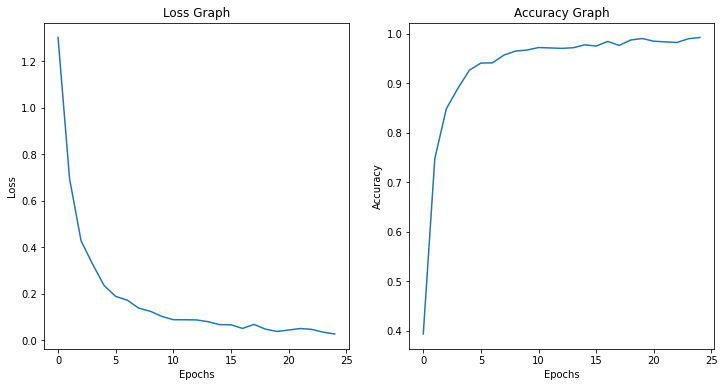

In [16]:
loss, accuracy = model2.evaluate(x = x_test2/255, y = y_test2)
print("Loss: ", loss, "\tAccuracy: ", accuracy)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].plot(hist2.history['loss'], label = "loss")
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Graph')

ax[1].plot(hist2.history['accuracy'], label = "accuracy")
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Graph')


After all revisions and tweaking were performed, the model now consistently runs at 90-94% accuracy every training period. Each step incrementally added to the overall accuracy of the model, however, it was noted that balancing the dataset as well as increasing the number of samples were the most significant factor in increasing the model's accuracy.